In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import sklearn.preprocessing as pre
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import wrangle as w

In [2]:
zillow = w.wrangle_zillow(remove=False)

In [3]:
zillow.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


In [4]:
train, validate, test = w.train_validate_test_split(zillow)

## 1.Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [5]:
normal_cols = ['bedrooms','bathrooms','year_built']
log_cols = ['square_feet','taxamount']

In [6]:
train_scaled = train.copy()

In [7]:
minmax_scaler = pre.MinMaxScaler()
train_scaled[['bedrooms_minmax','bathrooms_minmax', 'year_built_minmax']] = minmax_scaler.fit_transform(train[normal_cols])

standard_scaler = pre.StandardScaler()
train_scaled[['bedrooms_standard','bathrooms_standard', 'year_built_standard']] = standard_scaler.fit_transform(train[normal_cols])

robust_scaler = pre.RobustScaler()
train_scaled[['bedrooms_robust','bathrooms_robust', 'year_built_robust']] = robust_scaler.fit_transform(train[normal_cols])



## Vizualize

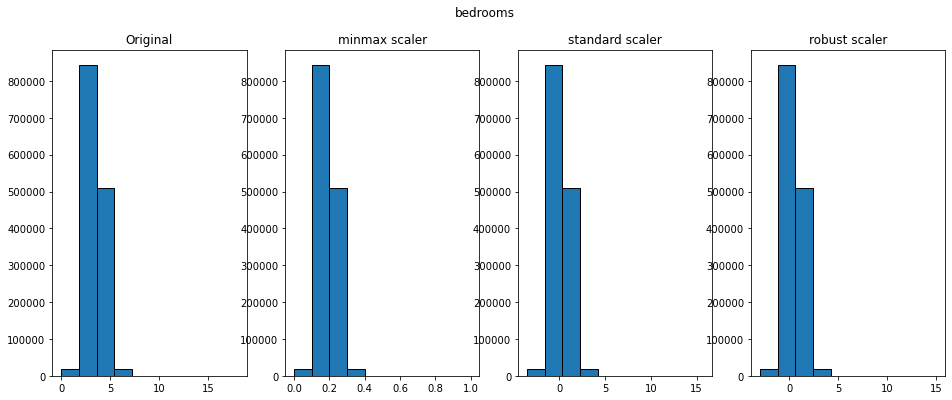

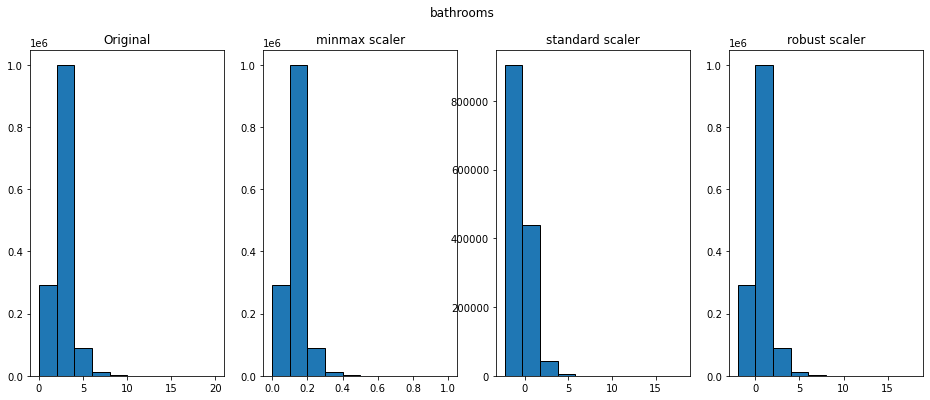

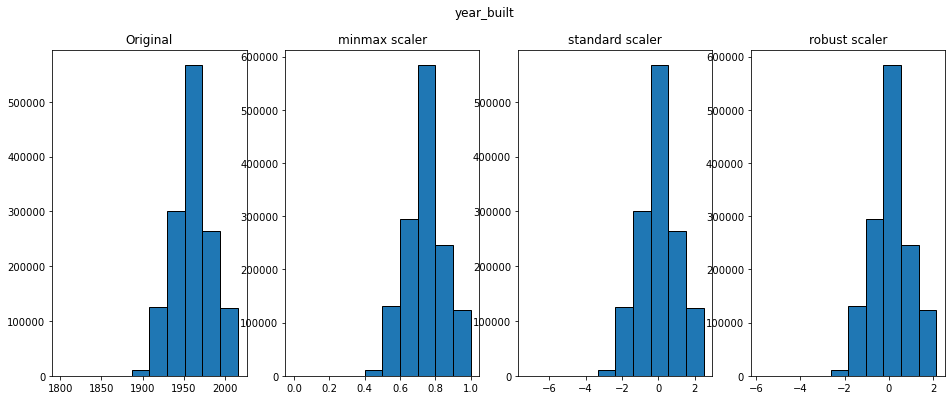

In [8]:
for col in normal_cols:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(16,6))
    fig.suptitle(f'{col}')
    ax1.hist(train_scaled[col], ec='black')
    ax1.set_title('Original')

    ax2.hist(train_scaled[f'{col}_minmax'], ec='black')
    ax2.set_title('minmax scaler')

    ax3.hist(train_scaled[f'{col}_standard'], ec='black')
    ax3.set_title('standard scaler')

    ax4.hist(train_scaled[f'{col}_robust'], ec='black')
    ax4.set_title('robust scaler')

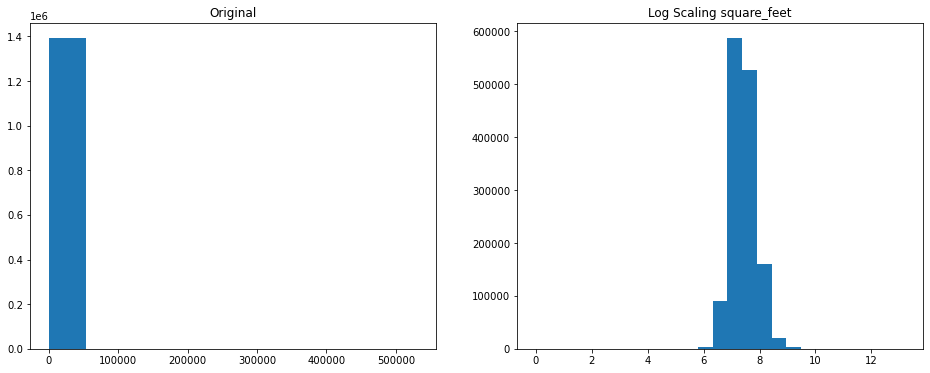

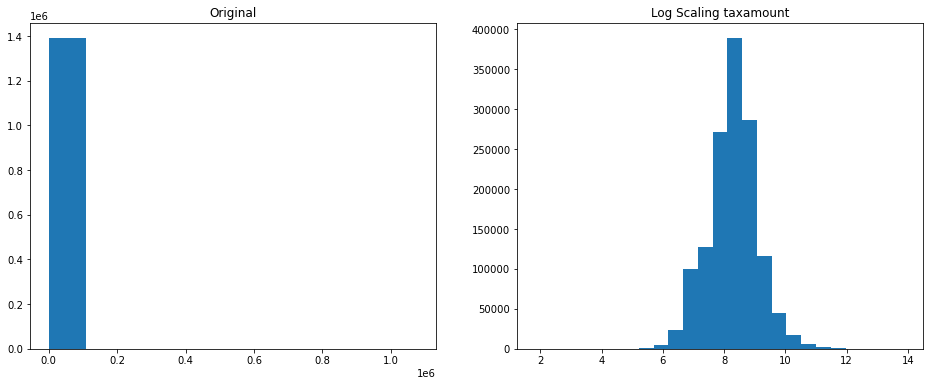

In [9]:
for col in log_cols:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    ax1.hist(train_scaled[col])
    ax1.set_title('Original')
    ax2.hist(np.log(train_scaled[col]), bins = 25)
    ax2.set_title(f'Log Scaling {col}')
    plt.show()

## 2. Apply the ```.inverse_transform``` method to your scaled data. Is the resulting dataset the exact same as the original data?

In [10]:
train_scaled[['bedrooms_minmax_inverse','bathrooms_minmax_inverse', 'year_built_minmax_inverse']] = minmax_scaler.fit_transform(train[normal_cols])
train_scaled[['bedrooms_standard_inverse','bathrooms_standard_inverse', 'year_built_standard_inverse']] = standard_scaler.fit_transform(train[normal_cols])
train_scaled[['bedrooms_robust_inverse','bathrooms_robust_inverse', 'year_built_robust_inverse']] = robust_scaler.inverse_transform(train[normal_cols])

train_scaled.head()



,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips,bedrooms_minmax,bathrooms_minmax,year_built_minmax,...,year_built_robust,bedrooms_minmax_inverse,bathrooms_minmax_inverse,year_built_minmax_inverse,bedrooms_standard_inverse,bathrooms_standard_inverse,year_built_standard_inverse,bedrooms_robust_inverse,bathrooms_robust_inverse,year_built_robust_inverse
2082563,4.0,2.0,1573.0,466000.0,1949.0,5665.05,6037.0,0.222222,0.100,0.688372,...,-0.333333,0.222222,0.100,0.688372,0.748475,-0.242832,-0.540444,7.0,4.0,54581.0
1690777,3.0,2.0,1427.0,449371.0,1964.0,5274.84,6111.0,0.166667,0.100,0.758140,...,0.222222,0.166667,0.100,0.758140,-0.323993,-0.242832,0.136557,6.0,4.0,54986.0
1459649,4.0,3.0,2629.0,574041.0,1961.0,7079.80,6037.0,0.222222,0.150,0.744186,...,0.111111,0.222222,0.150,0.744186,0.748475,0.767174,0.001157,7.0,5.0,54905.0
1315812,3.0,2.0,1548.0,428764.0,1957.0,5224.97,6037.0,0.166667,0.100,0.725581,...,-0.037037,0.166667,0.100,0.725581,-0.323993,-0.242832,-0.179377,6.0,4.0,54797.0
354653,4.0,2.5,2003.0,461730.0,2002.0,7176.64,6059.0,0.222222,0.125,0.934884,...,1.629630,0.222222,0.125,0.934884,0.748475,0.262171,1.851625,7.0,4.5,56012.0


**Returns weird data...***

## 3. Read the documentation for sklearn's ```QuantileTransformer```. Use normal for the ```output_distribution``` and apply this scaler to your data. Visualize the result of your data scaling.

In [11]:
train_scaled2 = train.copy()

In [12]:
quantile = pre.QuantileTransformer(output_distribution='normal')

In [13]:
train_scaled2[['bedrooms_quantile','bathrooms_quantile', 'year_built_quantile']] = quantile.fit_transform(train[normal_cols])



In [26]:
train_scaled2[['square_feet_quantile','taxamount_quantile']] = quantile.fit_transform(train[log_cols])



In [14]:
train_scaled2.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips,bedrooms_quantile,bathrooms_quantile,year_built_quantile
2082563,4.0,2.0,1573.0,466000.0,1949.0,5665.05,6037.0,0.726606,-0.181652,-0.689529
1690777,3.0,2.0,1427.0,449371.0,1964.0,5274.84,6111.0,-0.270485,-0.181652,0.282216
1459649,4.0,3.0,2629.0,574041.0,1961.0,7079.80,6037.0,0.726606,0.895780,0.125788
1315812,3.0,2.0,1548.0,428764.0,1957.0,5224.97,6037.0,-0.270485,-0.181652,-0.053973
354653,4.0,2.5,2003.0,461730.0,2002.0,7176.64,6059.0,0.726606,0.473810,1.700222


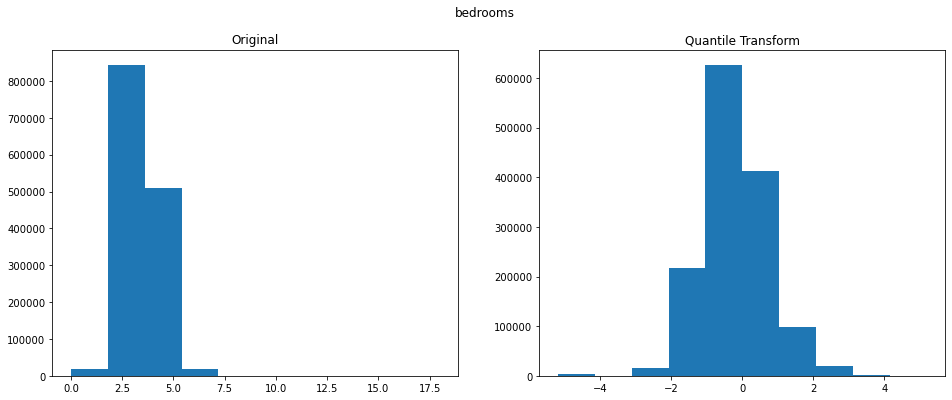

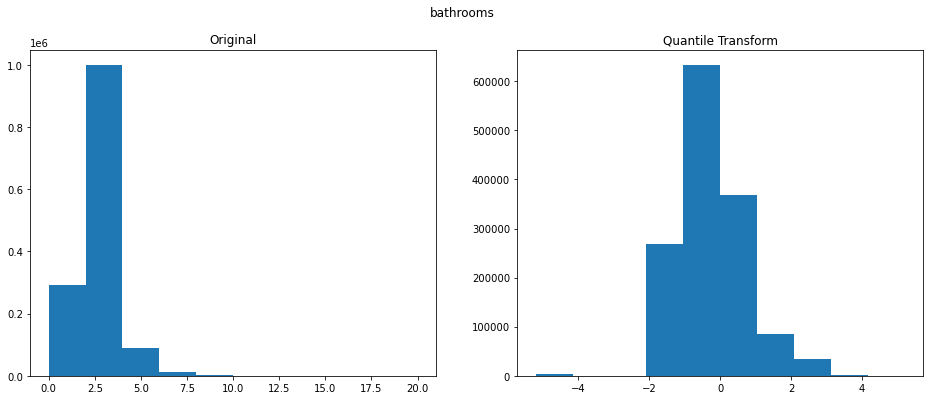

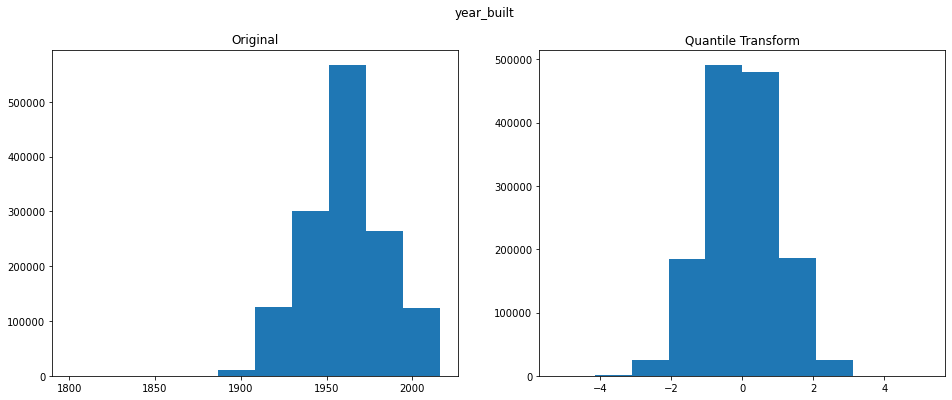

In [15]:
for col in normal_cols:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    fig.suptitle(f'{col}')
    ax1.hist(train_scaled2[col])
    ax1.set_title('Original')
    ax2.hist(train_scaled2[f'{col}_quantile'])
    ax2.set_title(f'Quantile Transform')
    plt.show()

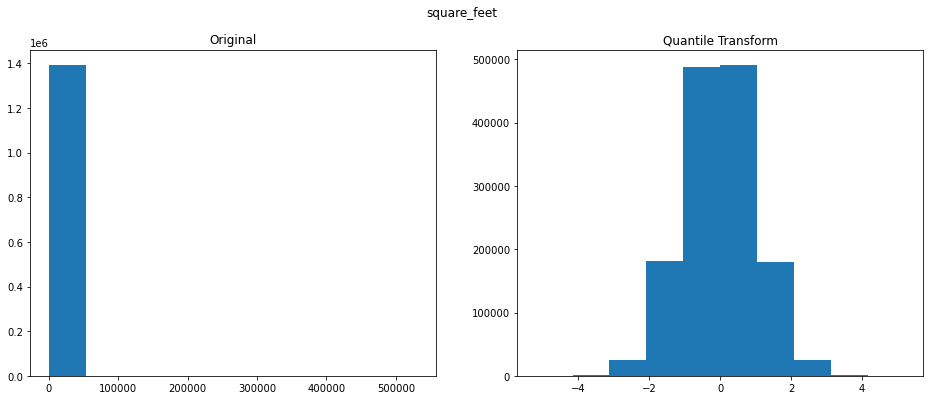

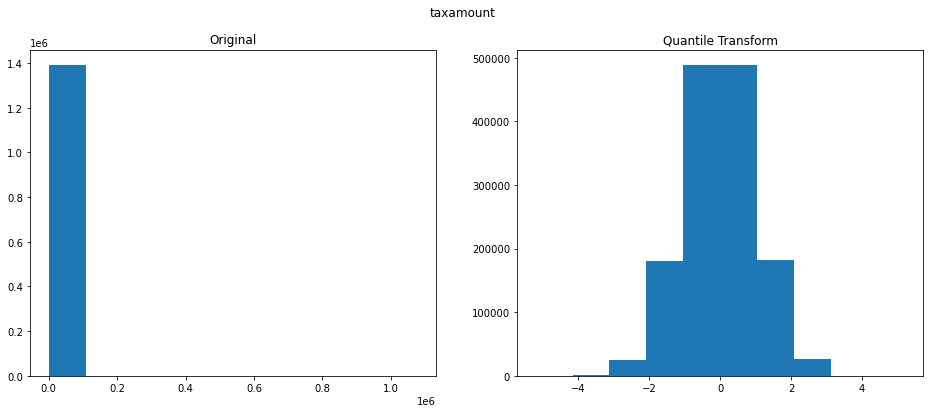

In [27]:
for col in log_cols:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    fig.suptitle(f'{col}')
    ax1.hist(train_scaled2[col])
    ax1.set_title('Original')
    ax2.hist(train_scaled2[f'{col}_quantile'])
    ax2.set_title(f'Quantile Transform')
    plt.show()

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [20]:
quantile1 = pre.QuantileTransformer()

In [22]:
train_scaled2[['square_feet_quantile1','taxamount_quantile1']] = quantile1.fit_transform(train[log_cols])



In [30]:
train_scaled2[['bedrooms_quantile1','bathrooms_quantile1', 'year_built_quantile1']] = quantile1.fit_transform(train[normal_cols])



In [31]:
train_scaled2.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips,bedrooms_quantile,bathrooms_quantile,year_built_quantile,bedrooms_quantile1,bathrooms_quantile1,year_built_quantile1,square_feet_quantile1,taxamount_quantile1,square_feet_quantile,taxamount_quantile
2082563,4.0,2.0,1573.0,466000.0,1949.0,5665.05,6037.0,0.726606,-0.181652,-0.689529,0.767768,0.429930,0.246747,0.467467,0.684911,-0.077862,0.490894
1690777,3.0,2.0,1427.0,449371.0,1964.0,5274.84,6111.0,-0.270485,-0.181652,0.282216,0.393894,0.429930,0.610110,0.369870,0.643767,-0.330873,0.379692
1459649,4.0,3.0,2629.0,574041.0,1961.0,7079.80,6037.0,0.726606,0.895780,0.125788,0.767768,0.813313,0.550050,0.851451,0.790409,1.040090,0.816249
1315812,3.0,2.0,1548.0,428764.0,1957.0,5224.97,6037.0,-0.270485,-0.181652,-0.053973,0.393894,0.429930,0.477978,0.451451,0.638125,-0.120731,0.364247
354653,4.0,2.5,2003.0,461730.0,2002.0,7176.64,6059.0,0.726606,0.473810,1.700222,0.767768,0.681181,0.955455,0.682015,0.795917,0.475214,0.835887


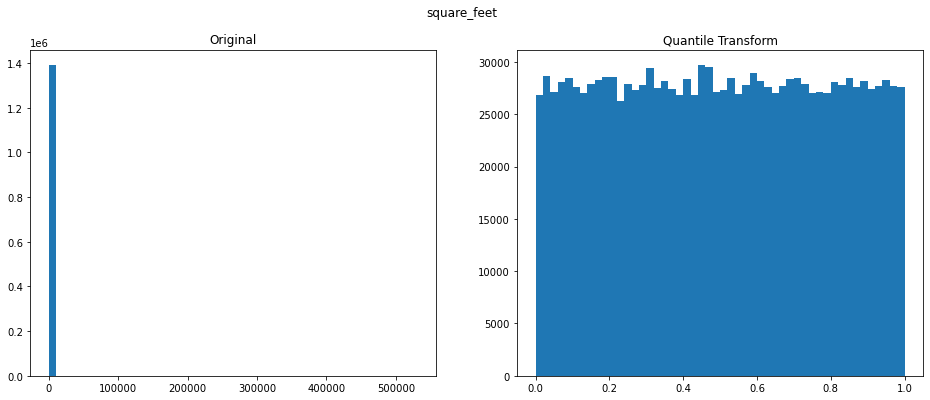

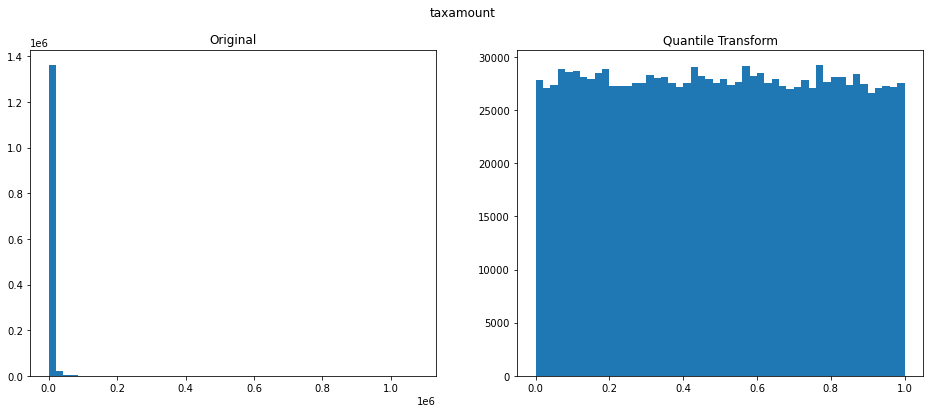

In [25]:
for col in log_cols:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    fig.suptitle(f'{col}')
    ax1.hist(train_scaled2[col], bins=50)
    ax1.set_title('Original')
    ax2.hist(train_scaled2[f'{col}_quantile1'], bins=50)
    ax2.set_title(f'Quantile Transform')
    plt.show()

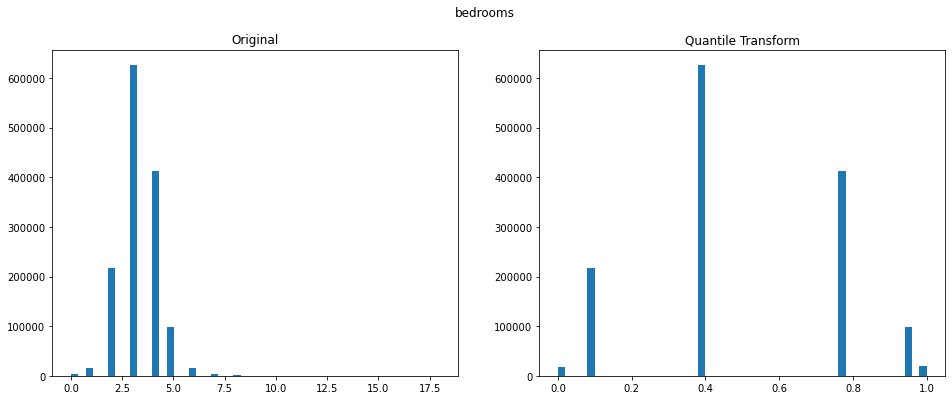

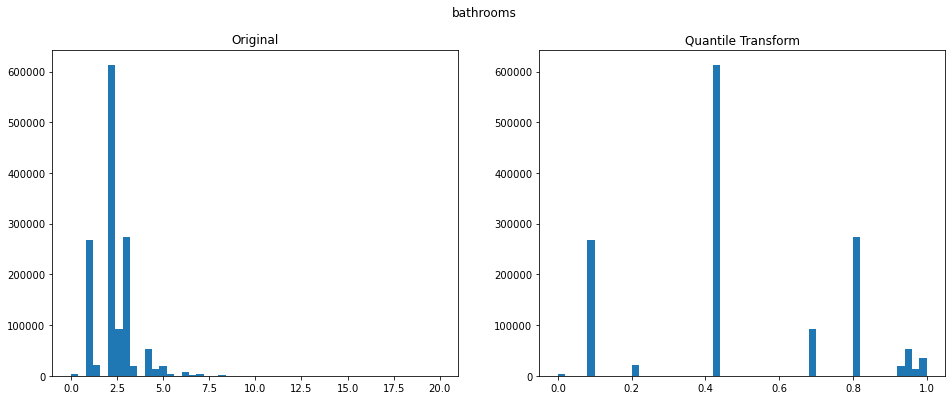

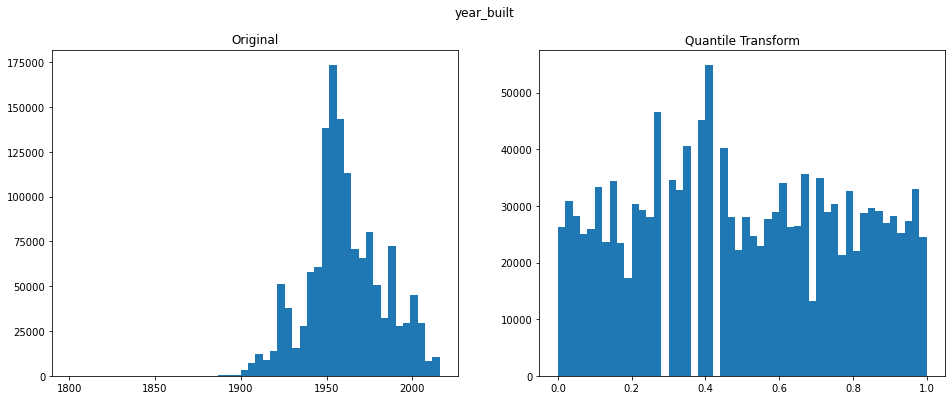

In [32]:
for col in normal_cols:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    fig.suptitle(f'{col}')
    ax1.hist(train_scaled2[col], bins=50)
    ax1.set_title('Original')
    ax2.hist(train_scaled2[f'{col}_quantile1'], bins=50)
    ax2.set_title(f'Quantile Transform')
    plt.show()

## 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your ```prepare.py``` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [43]:
def scale_zillow(train, validate, test, scale_features=['bedrooms', 'bathrooms', 'square_feet', 'taxamount']):
    '''
    Takes in train, validate, test and a list of features to scale
    and scales those features.
    Returns df with new columns with scaled data
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    quantile = pre.QuantileTransformer(output_distribution='normal')
    quantile.fit(train[scale_features])
    
    train_scaled[scale_features] = pd.DataFrame(quantile.transform(train[scale_features]),
                                                  columns=train[scale_features].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[scale_features] = pd.DataFrame(quantile.transform(validate[scale_features]),
                                                  columns=validate[scale_features].columns.values).set_index([validate.index.values])
    
    test_scaled[scale_features] = pd.DataFrame(quantile.transform(test[scale_features]),
                                                 columns=test[scale_features].columns.values).set_index([test.index.values])
    
    return train_scaled, validate_scaled, test_scaled

In [44]:
train_scaled, validate_scaled, test_scaled = scale_zillow(train, validate, test)

In [45]:
train_scaled.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips
2082563,0.723343,-0.172731,-0.082896,466000.0,1949.0,0.485245,6037.0
1690777,-0.273089,-0.172731,-0.330873,449371.0,1964.0,0.373509,6111.0
1459649,0.723343,0.908975,1.039370,574041.0,1961.0,0.814920,6037.0
1315812,-0.273089,-0.172731,-0.124523,428764.0,1957.0,0.359436,6037.0
354653,0.723343,0.487893,0.470537,461730.0,2002.0,0.832547,6059.0


In [5]:
train_scaled, validate_scaled, test_scaled = w.scale_zillow(train, validate, test)

In [6]:
train_scaled.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips
1569291,0.864365,-0.080379,-0.543789,227020.0,1959.0,-0.282763,6059.0
1155731,-5.199338,-5.199338,-0.497809,486700.0,1922.0,0.863849,6037.0
146488,0.864365,1.176890,1.325648,424287.0,1974.0,0.488937,6037.0
1223991,-0.209787,-5.199338,-0.391137,327116.0,1954.0,0.128646,6037.0
269816,0.864365,-0.080379,1.173137,369553.0,1985.0,0.378545,6111.0
